In [1]:
clc;
clear;

fileID = fopen('PHYSICAL.DAT', 'r'); 
PHYSICAL = textscan(fileID, '%f %f %f %f %f %f %f', 'HeaderLines', 3);
fclose(fileID);

In [2]:
disp(PHYSICAL)

  Columns 1 through 3

    {1188864x1 double}    {1188864x1 double}    {1188864x1 double}

  Columns 4 through 6

    {1188864x1 double}    {1188864x1 double}    {1188864x1 double}

  Column 7

    {1188864x1 double}



In [3]:
NX = 96; 
NY = 129; 
NZ = 96; 

Re =2800;

In [4]:
X1 = reshape(PHYSICAL{1}, [NZ, NY, NX]);
Y1 = reshape(PHYSICAL{2}, [NZ, NY, NX]);
Z1 = reshape(PHYSICAL{3}, [NZ, NY, NX]);
X2 = X1(1,1,:);
Y2 = Y1(1,:,1);
Z2 = Z1(:,1,1);
X = squeeze(X2);
Y = Y2';
Z = squeeze(Z2);

In [5]:
disp(size(X))
disp(size(Y))
disp(size(Z))

    96     1

   129     1

    96     1



In [6]:
tUp = reshape(PHYSICAL{4}, [NZ, NY, NX]);
tVp = reshape(PHYSICAL{5}, [NZ, NY, NX]);
tWp = reshape(PHYSICAL{6}, [NZ, NY, NX]);
tP = reshape(PHYSICAL{7}, [NZ, NY, NX]);
Up = permute(tUp, [3, 2, 1]);
Vp = permute(tVp, [3, 2, 1]);
Wp = permute(tWp, [3, 2, 1]);
 P = permute(tP, [3, 2, 1]);

In [7]:
u_avg = mean(Up, [1 3]);
v_avg = mean(Vp, [1 3]);
w_avg = mean(Wp, [1 3]);

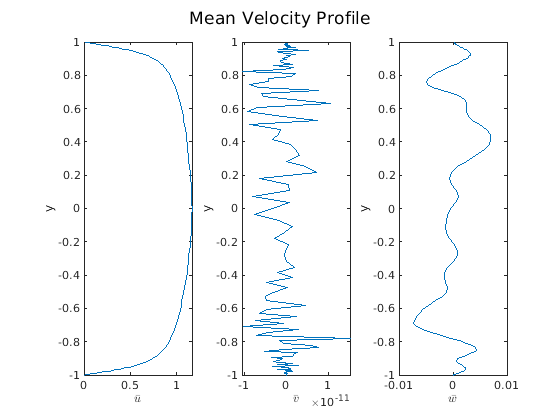

In [8]:
subplot(1, 3, 1)
plot(u_avg,Y)
xlabel('$\bar{u}$', 'Interpreter', 'latex')
ylabel('y')

subplot(1, 3, 2)
plot(v_avg,Y)
xlabel('$\bar{v}$', 'Interpreter', 'latex')
ylabel('y')

subplot(1, 3, 3)
plot(w_avg,Y)
xlabel('$\bar{w}$', 'Interpreter', 'latex')
ylabel('y')

figure1 = gcf;
sgtitle('Mean Velocity Profile','HorizontalAlignment', 'center');
print(figure1, 'Mean Velocity Profile.png', '-dpng', '-r300');

In [9]:
u_turb = Up - u_avg;
v_turb = Vp - v_avg;
w_turb = Wp - w_avg;

rey_uu = u_turb .* u_turb;
rey_uv = u_turb .* v_turb;
rey_uw = u_turb .* w_turb;
rey_vv = v_turb .* v_turb;
rey_vw = v_turb .* w_turb;
rey_ww = w_turb .* w_turb;

rey_uu = mean(rey_uu, [1 3]);
rey_uv = mean(rey_uv, [1 3]);
rey_uw = mean(rey_uw, [1 3]);
rey_vv = mean(rey_vv, [1 3]);
rey_vw = mean(rey_vw, [1 3]);
rey_ww = mean(rey_ww, [1 3]);

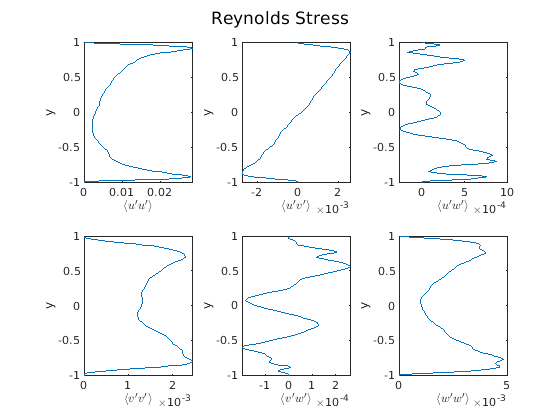

In [10]:
subplot(2, 3, 1)
plot(rey_uu,Y)
xlabel('$\langle{u''u''}\rangle$', 'Interpreter', 'latex');
ylabel('y')

subplot(2, 3, 2)
plot(rey_uv,Y)
xlabel('$\langle{u''v''}\rangle$', 'Interpreter', 'latex');
ylabel('y')

subplot(2, 3, 3)
plot(rey_uw,Y)
xlabel('$\langle{u''w''}\rangle$', 'Interpreter', 'latex');
ylabel('y')

subplot(2, 3, 4)
plot(rey_vv,Y) 
xlabel('$\langle{v''v''}\rangle$', 'Interpreter', 'latex');
ylabel('y')

subplot(2, 3, 5)
plot(rey_vw,Y)
xlabel('$\langle{v''w''}\rangle$', 'Interpreter', 'latex');
ylabel('y')

subplot(2, 3, 6)
plot(rey_ww,Y)
xlabel('$\langle{w''w''}\rangle$', 'Interpreter', 'latex');
ylabel('y')

figure2 = gcf;
sgtitle('Reynolds Stress','HorizontalAlignment', 'center');
print(figure2, 'Reynolds Stress.png', '-dpng', '-r300');

In [11]:
u_3 = u_turb .^ 3 ; 
v_3 = v_turb .^ 3 ;
w_3 = w_turb .^ 3 ;
u_4 = u_turb .^ 4 ;
v_4 = v_turb .^ 4 ;
w_4 = w_turb .^ 4 ;

u_3 = mean(u_3, [1 3]);
v_3 = mean(v_3, [1 3]);
w_3 = mean(w_3, [1 3]);
u_4 = mean(u_4, [1 3]);
v_4 = mean(v_4, [1 3]);
w_4 = mean(w_4, [1 3]);

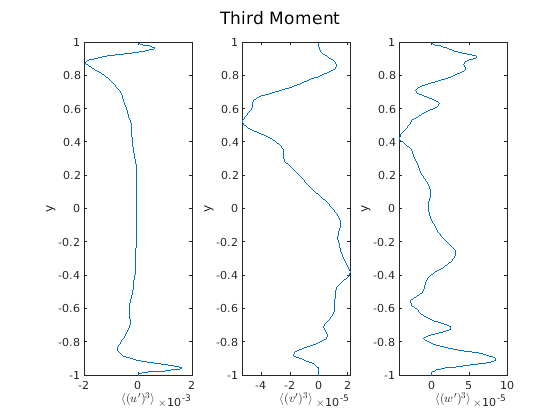

In [12]:
subplot(1, 3, 1)
plot(u_3,Y)
xlabel('$\langle{(u'')^3}\rangle$', 'Interpreter', 'latex')
ylabel('y')

subplot(1, 3, 2)
plot(v_3,Y)
xlabel('$\langle{(v'')^3}\rangle$', 'Interpreter', 'latex')
ylabel('y')

subplot(1, 3, 3)
plot(w_3,Y)
xlabel('$\langle{(w'')^3}\rangle$', 'Interpreter', 'latex')
ylabel('y')

figure3 = gcf;
sgtitle('Third Moment','HorizontalAlignment', 'center');
print(figure3, 'Third Moment.png', '-dpng', '-r300');

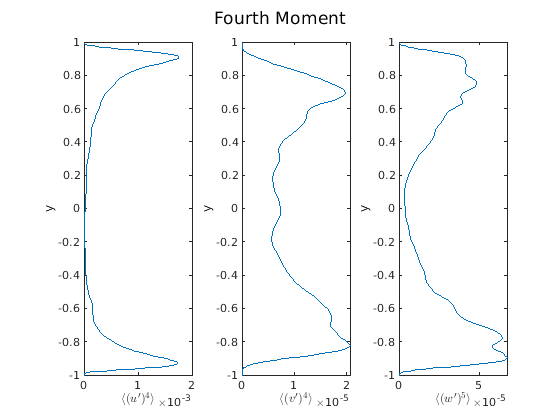

In [13]:
subplot(1, 3, 1)
plot(u_4,Y)
xlabel('$\langle{(u'')^4}\rangle$', 'Interpreter', 'latex')
ylabel('y')

subplot(1, 3, 2)
plot(v_4,Y)
xlabel('$\langle{(v'')^4}\rangle$', 'Interpreter', 'latex')
ylabel('y')

subplot(1, 3, 3)
plot(w_4,Y)
xlabel('$\langle{(w'')^5}\rangle$', 'Interpreter', 'latex')
ylabel('y')

figure1 = gcf;
sgtitle('Fourth Moment','HorizontalAlignment', 'center');
print(figure1, 'Fourth Moment.png', '-dpng', '-r300');